#  Particle Classification from LHC

The data that we have from the source https://zenodo.org/records/1230552  is from LHC which shows the Compressed PID's from LHC with six classifications ["pion", "electron", "muon", "ghost", "proton", "kaon"] which are denoted here as ["a", "b", "c", "d", "e", "f"], and features are mentioned for each particle based on the readings at LHC. We have built a classification model here to predict the nature of the particle based on the readings that we receive.

In [20]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools
import cv2
# load images
#%%
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
os.getcwd()
#%%
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy.stats import reciprocal, uniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from xgboost import XGBClassifier
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.ensemble import StackingClassifier
from scipy.special import softmax
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LHCb_PID_obscured.csv")
df

,pid,S5x0,S3x0,S2x0,S0x0,S0x1,S0x2,S0x3,S2x1,S2x2,...,S4x1,S4x2,S3x3,S4x3,S4x4,S5x2,S5x3,S5x4,S5x5,S4x5
0,a,1.0,1.0,1.0,12.470869,16.0,1.498864,4.0,0.0,0.0,...,43124.0,1.0,4497.850098,1696.200195,0.195356,1.046679,538.357971,35546.0,1.0,655.779785
1,f,1.0,-999.0,-999.0,2.611352,6.0,8.613868,9.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.942609,745.686462,35684.0,0.0,-999.000000
2,c,1.0,1.0,1.0,15.694536,17.0,5.911904,7.0,1.0,1.0,...,35553.0,1.0,566.271973,1401.664062,0.538877,0.841611,811.178467,35799.0,0.0,-2616.123047
3,d,-999.0,1.0,1.0,12.244493,14.0,2.455816,3.0,0.0,0.0,...,39028.0,1.0,4894.333984,85.869995,1.656766,-999.000000,-999.000000,-999.0,-999.0,230.555283
4,c,1.0,-999.0,-999.0,22.676029,19.0,4.777353,5.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.968089,1529.644287,34142.0,1.0,-999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272299,f,1.0,1.0,1.0,13.602895,15.0,7.836829,8.0,0.0,0.0,...,34016.0,1.0,3107.644043,2092.128174,0.056261,0.867213,454.600525,35563.0,0.0,-27961.513672
3272300,d,1.0,1.0,-999.0,14.595300,19.0,3.421998,5.0,-999.0,-999.0,...,34754.0,1.0,4684.835938,28.335392,1.779949,0.868534,12034.437500,42709.0,1.0,107.651237
3272301,a,1.0,1.0,1.0,18.010778,18.0,7.623046,7.0,0.0,0.0,...,35190.0,1.0,4155.253906,506.739197,0.169912,1.002034,342.101990,33564.0,0.0,-36.425983
3272302,c,1.0,1.0,-999.0,12.920311,18.0,0.897506,3.0,-999.0,-999.0,...,-999.0,-999.0,482.618011,-999.000000,-999.000000,1.084551,1960.894043,43245.0,1.0,-999.000000


In [ ]:

df=df.iloc[:1200000,:]
df.shape

In [7]:
df.columns

Index(['pid', 'S5x0', 'S3x0', 'S2x0', 'S0x0', 'S0x1', 'S0x2', 'S0x3', 'S2x1',
       'S2x2', 'S2x3', 'S0x4', 'S0x5', 'S0x6', 'S0x7', 'S0x8', 'S0x9', 'S0x10',
       'S0x11', 'S0x12', 'S0x13', 'S3x1', 'S3x2', 'S2x4', 'S2x5', 'S2x6',
       'S2x7', 'S0x14', 'S0x15', 'S0x16', 'S0x17', 'S0x18', 'S0x19', 'S1x0',
       'S1x1', 'S1x2', 'S1x3', 'S1x4', 'S1x5', 'S5x1', 'S4x0', 'S4x1', 'S4x2',
       'S3x3', 'S4x3', 'S4x4', 'S5x2', 'S5x3', 'S5x4', 'S5x5', 'S4x5'],
      dtype='object')

In [8]:
df.nunique()

pid            6
S5x0           2
S3x0           2
S2x0           2
S0x0     3003742
S0x1          30
S0x2     3120702
S0x3          24
S2x1           3
S2x2           3
S2x3           3
S0x4     2957272
S0x5           1
S0x6     3272304
S0x7     2060600
S0x8     3272304
S0x9     3076784
S0x10     878344
S0x11    2703282
S0x12     876171
S0x13          1
S3x1         761
S3x2         762
S2x4       62274
S2x5           2
S2x6        4656
S2x7          47
S0x14    3272304
S0x15    3272304
S0x16    3272304
S0x17     387255
S0x18    3272304
S0x19    3272304
S1x0      842279
S1x1      871830
S1x2      858437
S1x3      551069
S1x4      856320
S1x5           2
S5x1     2383554
S4x0     2032168
S4x1        5994
S4x2           2
S3x3     1341618
S4x3     2126963
S4x4     2070668
S5x2     1902120
S5x3     2028143
S5x4        6008
S5x5           3
S4x5     2139672
dtype: int64

In [ ]:
# df.replace(-999, np.NaN, inplace=True)

In [ ]:
# df

In [ ]:
n1df=pd.DataFrame(df.nunique())

In [ ]:
n1df

,0
pid,6
S5x0,2
S3x0,2
S2x0,2
S0x0,3003742
S0x1,30
S0x2,3120702
S0x3,24
S2x1,3
S2x2,3


In [ ]:
ndf=pd.DataFrame(df.isnull().sum())

In [ ]:
ndf

,0
pid,0
S5x0,0
S3x0,0
S2x0,0
S0x0,0
S0x1,0
S0x2,0
S0x3,0
S2x1,0
S2x2,0


In [ ]:
df

,pid,S5x0,S3x0,S2x0,S0x0,S0x1,S0x2,S0x3,S2x1,S2x2,...,S4x1,S4x2,S3x3,S4x3,S4x4,S5x2,S5x3,S5x4,S5x5,S4x5
0,a,1.0,1.0,1.0,12.470869,16.0,1.498864,4.0,0.0,0.0,...,43124.0,1.0,4497.850098,1696.200195,0.195356,1.046679,538.357971,35546.0,1.0,655.779785
1,f,1.0,-999.0,-999.0,2.611352,6.0,8.613868,9.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.942609,745.686462,35684.0,0.0,-999.000000
2,c,1.0,1.0,1.0,15.694536,17.0,5.911904,7.0,1.0,1.0,...,35553.0,1.0,566.271973,1401.664062,0.538877,0.841611,811.178467,35799.0,0.0,-2616.123047
3,d,-999.0,1.0,1.0,12.244493,14.0,2.455816,3.0,0.0,0.0,...,39028.0,1.0,4894.333984,85.869995,1.656766,-999.000000,-999.000000,-999.0,-999.0,230.555283
4,c,1.0,-999.0,-999.0,22.676029,19.0,4.777353,5.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.968089,1529.644287,34142.0,1.0,-999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272299,f,1.0,1.0,1.0,13.602895,15.0,7.836829,8.0,0.0,0.0,...,34016.0,1.0,3107.644043,2092.128174,0.056261,0.867213,454.600525,35563.0,0.0,-27961.513672
3272300,d,1.0,1.0,-999.0,14.595300,19.0,3.421998,5.0,-999.0,-999.0,...,34754.0,1.0,4684.835938,28.335392,1.779949,0.868534,12034.437500,42709.0,1.0,107.651237
3272301,a,1.0,1.0,1.0,18.010778,18.0,7.623046,7.0,0.0,0.0,...,35190.0,1.0,4155.253906,506.739197,0.169912,1.002034,342.101990,33564.0,0.0,-36.425983
3272302,c,1.0,1.0,-999.0,12.920311,18.0,0.897506,3.0,-999.0,-999.0,...,-999.0,-999.0,482.618011,-999.000000,-999.000000,1.084551,1960.894043,43245.0,1.0,-999.000000


In [ ]:
df['pid'].value_counts()

a    545384
f    545384
c    545384
d    545384
e    545384
b    545384
Name: pid, dtype: int64

In [ ]:
df.fillna(0, inplace=True)
df

,pid,S5x0,S3x0,S2x0,S0x0,S0x1,S0x2,S0x3,S2x1,S2x2,...,S4x1,S4x2,S3x3,S4x3,S4x4,S5x2,S5x3,S5x4,S5x5,S4x5
0,a,1.0,1.0,1.0,12.470869,16.0,1.498864,4.0,0.0,0.0,...,43124.0,1.0,4497.850098,1696.200195,0.195356,1.046679,538.357971,35546.0,1.0,655.779785
1,f,1.0,-999.0,-999.0,2.611352,6.0,8.613868,9.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.942609,745.686462,35684.0,0.0,-999.000000
2,c,1.0,1.0,1.0,15.694536,17.0,5.911904,7.0,1.0,1.0,...,35553.0,1.0,566.271973,1401.664062,0.538877,0.841611,811.178467,35799.0,0.0,-2616.123047
3,d,-999.0,1.0,1.0,12.244493,14.0,2.455816,3.0,0.0,0.0,...,39028.0,1.0,4894.333984,85.869995,1.656766,-999.000000,-999.000000,-999.0,-999.0,230.555283
4,c,1.0,-999.0,-999.0,22.676029,19.0,4.777353,5.0,-999.0,-999.0,...,-999.0,-999.0,-999.000000,-999.000000,-999.000000,0.968089,1529.644287,34142.0,1.0,-999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272299,f,1.0,1.0,1.0,13.602895,15.0,7.836829,8.0,0.0,0.0,...,34016.0,1.0,3107.644043,2092.128174,0.056261,0.867213,454.600525,35563.0,0.0,-27961.513672
3272300,d,1.0,1.0,-999.0,14.595300,19.0,3.421998,5.0,-999.0,-999.0,...,34754.0,1.0,4684.835938,28.335392,1.779949,0.868534,12034.437500,42709.0,1.0,107.651237
3272301,a,1.0,1.0,1.0,18.010778,18.0,7.623046,7.0,0.0,0.0,...,35190.0,1.0,4155.253906,506.739197,0.169912,1.002034,342.101990,33564.0,0.0,-36.425983
3272302,c,1.0,1.0,-999.0,12.920311,18.0,0.897506,3.0,-999.0,-999.0,...,-999.0,-999.0,482.618011,-999.000000,-999.000000,1.084551,1960.894043,43245.0,1.0,-999.000000


In [ ]:
df_new=df

In [ ]:
df_new.shape

(1200000, 51)

In [ ]:
X=df_new.drop(columns=['pid'])
y=df_new['pid']

In [ ]:
y=y.replace({'a': 0,
    'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5})

In [ ]:

# Assuming X is your feature matrix without the 'pid' column, and y is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

n_features = X_train_scaled.shape[1]
explained_variance_ratios = []
n_components_range = range(1, n_features + 1)

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Find the optimal number of components based on the explained variance ratio
optimal_n_components = np.argmax(explained_variance_ratios) + 1
print("Optimal number of components:", optimal_n_components)

# Step 4: Fit PCA with the optimal number of components and transform the features
pca = PCA(n_components=optimal_n_components)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)


Optimal number of components: 48


In [ ]:


# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}

# Initialize the Logistic Regression classifier
logreg_model = LogisticRegression()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_grid, n_iter=5, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_logreg_model = random_search.best_estimator_

# Predict the target variable for the test set using the best model
y_pred = best_logreg_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model with hyperparameter tuning:", accuracy)

# Print the best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Accuracy of Logistic Regression model with hyperparameter tuning: 0.7277583333333333
Best hyperparameters: {'penalty': 'l2', 'C': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Evaluate the best model on the test set
test_accuracy = rf.score(X_test, y_test)
print("Accuracy of best model on test set: {:.2f}%".format(test_accuracy * 100))

Accuracy of best model on test set: 74.06%


In [ ]:


# Assuming X_train and X_test are your original data arrays

# Reshape X_train and X_test to fit the LSTM model
# Assuming X_train and X_test have the shape (number_of_samples, number_of_features)
time_steps = 1 # You can adjust this value based on your data
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], time_steps, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], time_steps, X_test.shape[1]))
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
# Define the model architecture
rnn_model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    LSTM(units=64, return_sequences=True),  # Second LSTM layer
    LSTM(units=64),  # Third LSTM layer
    Dense(units=6, activation='softmax')  # Output layer with 6 classes for classification
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
rnn_model.fit(X_train_reshaped, y_train_encoded, epochs=20, batch_size=32, validation_split=0.18)

# Evaluate the model on the test data
test_loss, test_accuracy = rnn_model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
27675/27675 [==============================] - 189s 7ms/step - loss: 0.1888 - accuracy: 0.7351 - val_loss: 0.1828 - val_accuracy: 0.7427
Epoch 2/20
27675/27675 [==============================] - 185s 7ms/step - loss: 0.1814 - accuracy: 0.7431 - val_loss: 0.1813 - val_accuracy: 0.7416
Epoch 3/20
27675/27675 [==============================] - 190s 7ms/step - loss: 0.1794 - accuracy: 0.7457 - val_loss: 0.1792 - val_accuracy: 0.7465
Epoch 4/20
27675/27675 [==============================] - 199s 7ms/step - loss: 0.1782 - accuracy: 0.7472 - val_loss: 0.1788 - val_accuracy: 0.7467
Epoch 5/20
27675/27675 [==============================] - 204s 7ms/step - loss: 0.1774 - accuracy: 0.7483 - val_loss: 0.1781 - val_accuracy: 0.7475
Epoch 6/20
27675/27675 [==============================] - 200s 7ms/step - loss: 0.1767 - accuracy: 0.7494 - val_loss: 0.1774 - val_accuracy: 0.7477
Epoch 7/20
27675/27675 [==============================] - 197s 7ms/step - loss: 0.1762 - accuracy: 0.7500 - val_

In [ ]:

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

# Create an instance of the XGBoost classifier
xgb_classifier = XGBClassifier()

# Perform randomized search cross-validation
randomized_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, verbose=2, random_state=42)

# Fit the classifier to the training data
randomized_search.fit(X_train, y_train)

# Get the best parameters found by randomized search
best_params = randomized_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best estimator on the test data
xgb_model = randomized_search.best_estimator_
accuracy = xgb_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time= 1.6min
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time= 1.6min
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.6; total time= 1.6min
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time= 2.9min
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time= 2.9min
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time= 2.9min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time= 2.2min
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, 

In [ ]:

# Define the number of classes
num_classes = 6

# Define the number of neurons
num_neurons = 128

# Define the number of layers
num_layers =5

# Create a Sequential model
nn_model = Sequential()

# Add layers to the model
nn_model.add(Dense(num_neurons, activation='relu', input_shape=(optimal_n_components,)))  # Input layer

# Add hidden layers
for _ in range(num_layers - 2):
    nn_model.add(Dense(num_neurons, activation='relu'))

# Add output layer
nn_model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for classification

# Compile the model with Adagrad optimizer
nn_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               6272      
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
Total params: 56582 (221.02 KB)
Trainable params: 56582 (221.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.25)

# Evaluate the model on the test data
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
12657/12657 [==============================] - 53s 4ms/step - loss: 0.6916 - accuracy: 0.7239 - val_loss: 0.6683 - val_accuracy: 0.7281
Epoch 2/10
12657/12657 [==============================] - 52s 4ms/step - loss: 0.6471 - accuracy: 0.7362 - val_loss: 0.6443 - val_accuracy: 0.7370
Epoch 3/10
12657/12657 [==============================] - 51s 4ms/step - loss: 0.6391 - accuracy: 0.7388 - val_loss: 0.6377 - val_accuracy: 0.7376
Epoch 4/10
12657/12657 [==============================] - 51s 4ms/step - loss: 0.6340 - accuracy: 0.7398 - val_loss: 0.6326 - val_accuracy: 0.7400
Epoch 5/10
12657/12657 [==============================] - 53s 4ms/step - loss: 0.6302 - accuracy: 0.7415 - val_loss: 0.6305 - val_accuracy: 0.7404
Epoch 6/10
12657/12657 [==============================] - 54s 4ms/step - loss: 0.6271 - accuracy: 0.7422 - val_loss: 0.6282 - val_accuracy: 0.7411
Epoch 7/10
12657/12657 [==============================] - 54s 4ms/step - loss: 0.6246 - accuracy: 0.7431 - val_loss: 0

In [ ]:

# Assuming df_new contains image data and labels for classification

# Define the number of classes
num_classes = 6

# Build the CNN model
cnn_model = Sequential()
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], 1)
# # Reshape X_array to add the channel dimension (assuming grayscale images)
# X_array = X_array.reshape(X_array.shape[0], X_array.shape[1], X_array.shape[2], 1)
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)
 # Shape of one input sample excluding the batch size

# Add convolutional layers
cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(1, 2)))

cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(1, 2)))

cnn_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(1, 2)))

cnn_model.add(Flatten())

# Add fully connected layers
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for classification

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Train the model
cnn_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2)
# Print training accuracy
train_loss, train_accuracy = cnn_model.evaluate(X_train_reshaped, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy}")

# Test the model
test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Testing Accuracy: {test_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 48, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 24, 64)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 24, 128)        73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 12, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 12, 256)        295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 6, 256)        

In [ ]:
model_path ="/content/drive/MyDrive/cnn_model.h5"
cnn_model.save(model_path)
model_path ="/content/drive/MyDrive/rnn_model.h5"
rnn_model.save(model_path)
model_path ="/content/drive/MyDrive/nn_model.h5"
nn_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1], 1)

# # Step 1: Train each individual model
# logreg_model.fit(X_train, y_train)
# knn_model.fit(X_train, y_train)
# rnn_model.fit(X_train_reshaped, y_train_encoded, epochs=20, batch_size=32, validation_split=0.18)
# nn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.25)
# cnn_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 2: Make predictions on the validation set
xgb_pred = xgb_model.predict_proba(X_val)
rnn_pred = rnn_model.predict(X_val_reshaped)  # Use predict instead of predict_proba for neural networks
cnn_pred = cnn_model.predict(X_val_reshaped)
nn_pred = nn_model.predict(X_val)

# Assuming you want to convert raw predictions to probabilities for the neural network model

rnn_pred = softmax(rnn_pred, axis=1)
nn_pred = softmax(nn_pred, axis=1)

# Step 3: Concatenate predictions to create new feature matrix
X_val_stacked = np.column_stack((xgb_pred, cnn_pred, rnn_pred, nn_pred))



5400/5400 [==============================] - 9s 2ms/step


In [ ]:
# Step 4: Train a meta-classifier (Logistic Regression) on the concatenated predictions
meta_classifier = LogisticRegression()
meta_classifier.fit(X_val_stacked, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Step 5: Evaluate the stacked model on the test set

xgb_pred_test = xgb_model.predict_proba(X_test)
rnn_pred_test = rnn_model.predict(X_test_reshaped)  # Use predict instead of predict_proba for neural networks
cnn_pred_test = cnn_model.predict(X_test_reshaped)
nn_pred_test = nn_model.predict(X_test)

rnn_pred_test = softmax(rnn_pred_test, axis=1)
nn_pred_test = softmax(nn_pred_test, axis=1)

X_test_stacked = np.column_stack((xgb_pred_test, cnn_pred_test, rnn_pred_test, nn_pred_test))

3750/3750 [==============================] - 6s 2ms/step


In [ ]:
final_accuracy = meta_classifier.score(X_test_stacked, y_test)
print("Final Accuracy of Stacked Classifier:", final_accuracy)

Final Accuracy of Stacked Classifier: 0.739325


In [10]:
X=df.drop(columns=['pid'])
y=df['pid']

y=y.replace({'a': 0,
    'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5})

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Step 4: Fit PCA with the optimal number of components and transform the features
pca = PCA(n_components=48)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)

In [13]:

time_steps = 1 # You can adjust this value based on your data
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], time_steps, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], time_steps, X_test.shape[1]))
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:


rnn_model.fit(X_train_reshaped, y_train_encoded, epochs=20, batch_size=32, validation_split=0.18)

Epoch 1/20
75468/75468 [==============================] - 633s 8ms/step - loss: 0.1837 - accuracy: 0.7407 - val_loss: 0.1797 - val_accuracy: 0.7458
Epoch 2/20
75468/75468 [==============================] - 576s 8ms/step - loss: 0.1781 - accuracy: 0.7475 - val_loss: 0.1775 - val_accuracy: 0.7485
Epoch 3/20
75468/75468 [==============================] - 613s 8ms/step - loss: 0.1766 - accuracy: 0.7496 - val_loss: 0.1767 - val_accuracy: 0.7494
Epoch 4/20
75468/75468 [==============================] - 583s 8ms/step - loss: 0.1756 - accuracy: 0.7509 - val_loss: 0.1761 - val_accuracy: 0.7493
Epoch 5/20
75468/75468 [==============================] - 579s 8ms/step - loss: 0.1749 - accuracy: 0.7520 - val_loss: 0.1754 - val_accuracy: 0.7509
Epoch 6/20
75468/75468 [==============================] - 620s 8ms/step - loss: 0.1744 - accuracy: 0.7525 - val_loss: 0.1755 - val_accuracy: 0.7511
Epoch 7/20
75468/75468 [==============================] - 588s 8ms/step - loss: 0.1740 - accuracy: 0.7532 - val_

In [ ]:
model_path ="/content/drive/MyDrive/rnn_model.h5"
rnn_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:


# Load the saved model
rnn_model = load_model("/content/drive/MyDrive/rnn_model.h5")

In [15]:

# Evaluate the model on the test set
evaluation = rnn_model.evaluate(X_test_reshaped, y_test_encoded)

# Predict probabilities on the test set
y_pred_prob = rnn_model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

10226/10226 [==============================] - 33s 3ms/step


In [16]:
y_pred

array([0, 5, 3, ..., 2, 3, 3])

Evaluation Metrics:
Loss: 0.17444245517253876
Accuracy: 0.7515608072280884

Classification Report:
              precision    recall  f1-score   support

           a       0.75      0.78      0.77     54476
           b       0.84      0.92      0.88     54469
           c       0.81      0.86      0.84     54665
           d       0.79      0.74      0.77     54436
           e       0.62      0.70      0.66     54683
           f       0.69      0.49      0.58     54502

    accuracy                           0.75    327231
   macro avg       0.75      0.75      0.75    327231
weighted avg       0.75      0.75      0.75    327231



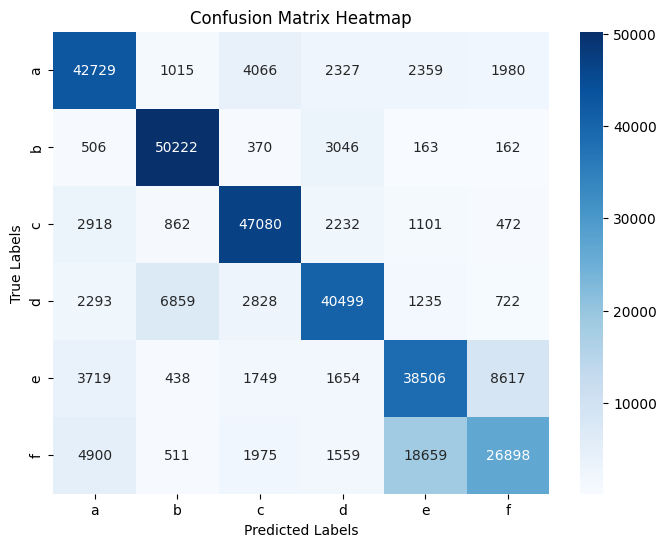

In [18]:

label_mapping = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f'}
# Convert numpy arrays to pandas Series
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

# Replace numeric labels with original labels in y_test and y_pred
y_test_labels = y_test_series.replace(label_mapping)
y_pred_labels = y_pred_series.replace(label_mapping)

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Generate classification report
report = classification_report(y_test_labels, y_pred_labels, target_names=label_mapping.values())

# Print evaluation metrics and classification report
print("Evaluation Metrics:")
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")
print("\nClassification Report:")
print(report)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


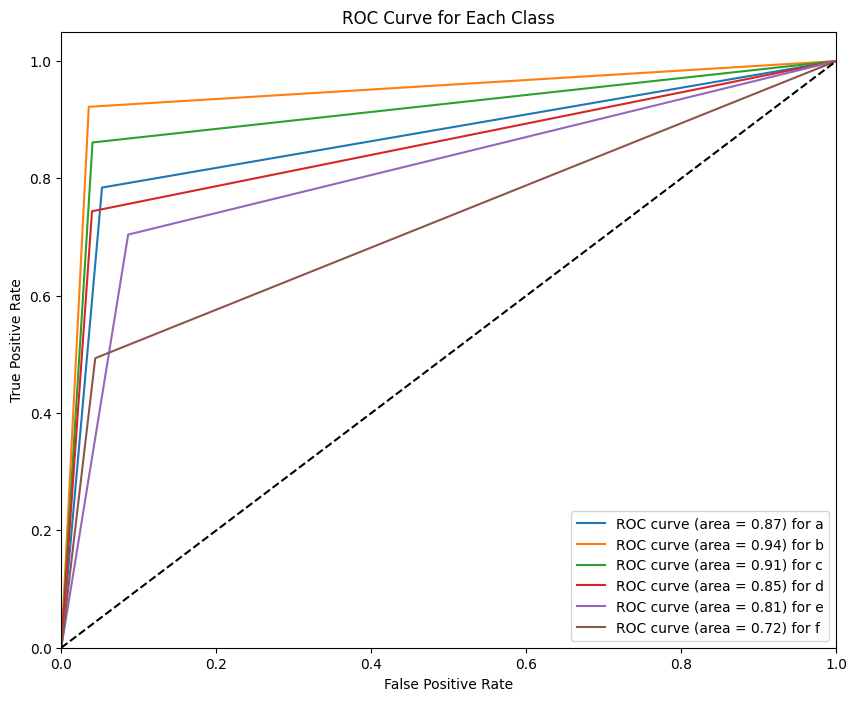

In [19]:

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Convert labels to one-hot encoding
y_test_one_hot = pd.get_dummies(y_test_labels)
y_pred_one_hot = pd.get_dummies(y_pred_labels)

# Compute ROC curve and ROC area for each class
for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot.iloc[:, i], y_pred_one_hot.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {list(label_mapping.values())[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()
